# Курсовой проект для курса "Python для Data Science"
**Автор**: Кабанов Сергей

**Материалы к проекту (файлы)**:  
train.csv  
test.csv

**Задание**:  
Используя данные из train.csv, построить модель для предсказания цен на недвижимость (квартиры). С помощью полученной модели предсказать цены для квартир из файла test.csv.

**Целевая переменная**:  
Price

**Основная метрика**:  
R2 - коэффициент детерминации (sklearn.metrics.r2_score)

**Вспомогательная метрика**:  
MSE - средняя квадратичная ошибка (sklearn.metrics.mean_squared_error)

**Сдача проекта**:
1. Прислать в раздел Задания Урока 12 ("Вебинар. Консультация по итоговому проекту") ссылку на программу в github (программа должна содержаться в файле Jupyter Notebook с расширением ipynb).
2. Приложить файл с названием по образцу SShirkin_predictions.csv с предсказанными ценами для квартир из test.csv (файл должен содержать два поля: Id, Price).

**Сроки сдачи**:
Сдать проект за 72 часа до начала Урока 13 ("Вебинар. Результаты итоговых проектов и закрытие курса").

**Примечание**:
Все файлы csv должны содержать названия полей (header - то есть "шапку"), разделитель - запятая. В файлах не должны содержаться индексы из датафрейма.

## План работы:
1. Подготовка окружения
2. Загрузка данных
3. Первичный анализ
4. Первичная очистка данных
5. Первичная модель и базовая оценка
6. Анализ данных на аномалии и ошибки
7. Очистка данных
8. Оценка модели на очищенных данных
9. Конструирование признаков
10. Обучение моделей и выбор лучшей
11. Итоговое предсказание

## Подготовка окружения

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

RANDOM_STATE = 427

TRAIN_DATA_FILE = 'train.csv'
TEST_DATA_FILE = 'test.csv'

## Загрузка данных

In [4]:
data_train = pd.read_csv(TRAIN_DATA_FILE)
data_test = pd.read_csv(TEST_DATA_FILE)

## Первичный анализ

In [5]:
data_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [6]:
data_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [7]:
data_train.shape, data_test.shape

((10000, 20), (5000, 19))

In [8]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [9]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


In [12]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,10000.0,8383.407700,4859.019020,0.000000,4169.500000,8394.500000,12592.500000,1.679800e+04
DistrictId,10000.0,50.400800,43.587592,0.000000,20.000000,36.000000,75.000000,2.090000e+02
Rooms,10000.0,1.890500,0.839512,0.000000,1.000000,2.000000,2.000000,1.900000e+01
Square,10000.0,56.315775,21.058732,1.136859,41.774881,52.513310,65.900625,6.410652e+02
LifeSquare,7887.0,37.199645,86.241209,0.370619,22.769832,32.781260,45.128803,7.480592e+03
KitchenSquare,10000.0,6.273300,28.560917,0.000000,1.000000,6.000000,9.000000,2.014000e+03
Floor,10000.0,8.526700,5.241148,1.000000,4.000000,7.000000,12.000000,4.200000e+01
HouseFloor,10000.0,12.609400,6.775974,0.000000,9.000000,13.000000,17.000000,1.170000e+02
HouseYear,10000.0,3990.166300,200500.261427,1910.000000,1974.000000,1977.000000,2001.000000,2.005201e+07
Ecology_1,10000.0,0.118858,0.119025,0.000000,0.017647,0.075424,0.195781,5.218671e-01


In [13]:
data_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,5000.0,8412.595400,4832.674037,1.000000,4221.750000,8320.500000,12598.250000,16795.000000
DistrictId,5000.0,51.279200,44.179466,0.000000,21.000000,37.000000,77.000000,212.000000
Rooms,5000.0,1.910000,0.838594,0.000000,1.000000,2.000000,2.000000,17.000000
Square,5000.0,56.449500,19.092787,1.378543,41.906231,52.921340,66.285129,223.453689
LifeSquare,3959.0,36.158810,17.825287,0.333490,23.092026,32.925087,45.174091,303.071094
KitchenSquare,5000.0,5.976800,9.950018,0.000000,1.000000,6.000000,9.000000,620.000000
Floor,5000.0,8.632000,5.483228,1.000000,4.000000,7.000000,12.000000,78.000000
HouseFloor,5000.0,12.601000,6.789213,0.000000,9.000000,12.000000,17.000000,99.000000
HouseYear,5000.0,1984.392600,18.573149,1908.000000,1973.000000,1977.000000,2000.000000,2020.000000
Ecology_1,5000.0,0.119874,0.120070,0.000000,0.019509,0.072158,0.195781,0.521867


Пропущенные значения в полях LifeSquare и Healthcare_1 - уберем эти поля из первичной модели.

Нечисловые признаки так же уберем из первичной модели.

Явная опечатка в поле HouseYear (20052011 -> 2008) - исправить вручную.

Явная опечатка в поле KitchenSquare (2014 -> 6) - исправить вручную.

Явная опечатка в поле HouseFloor (117 -> 17) - исправить вручную.

## Первичная очистка данных

In [14]:
data_train[data_train.HouseYear > 2020]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.534396
4189,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.603096


In [18]:
data_train.loc[data_train['Id'] == 10814, 'HouseYear'] = 2008

In [19]:
data_train.loc[data_train['Id'] == 11607, 'HouseYear'] = 1968

In [20]:
data_train[data_train.KitchenSquare == 2014]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1064,14656,62,1.0,47.100719,46.44796,2014.0,4,1.0,2014,0.072158,B,B,2,629,1,NaN,0,0,A,108337.484207


In [22]:
# заменим на медиану
data_train.loc[data_train['Id'] == 14656, 'KitchenSquare'] = 6

In [23]:
data_train[data_train.HouseFloor == 117]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
8854,78,30,2.0,65.773749,66.811789,1.0,8,117.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B,207248.37052


In [25]:
data_train.loc[data_train['Id'] == 78, 'HouseFloor'] = 17

## Первичная модель и базовая оценка

In [26]:
# Для первичной оценки попробуем линейную регрессию и случайный лес
from sklearn.linear_model import LinearRegression as LR
from sklearn.ensemble import RandomForestRegressor as RF

In [27]:
from sklearn.model_selection import train_test_split

In [48]:
data_train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

In [68]:
# убираем 'Id', 'LifeSquare', 'Ecology_2', 'Ecology_3', 'Healthcare_1', 'Shops_2'
features = [
    'DistrictId', 'Rooms', 'Square', 'KitchenSquare',
    'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 
    'Social_2', 'Social_3', 'Helthcare_2', 'Shops_1'
]


target = ['Price']

In [69]:
X = pd.DataFrame(data_train[features], columns=features)
y = data_train[target]

In [70]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

In [71]:
lr = LR()
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_valid)

In [76]:
rf = RF(n_estimators=100, max_depth=10, random_state=RANDOM_STATE)
rf.fit(X_train, y_train.values.ravel())
rf_y_pred = rf.predict(X_valid)

In [61]:
from sklearn.metrics import r2_score as r2, mean_squared_error as mse

In [79]:
r2(y_valid, lr_y_pred), mse(y_valid, lr_y_pred)

(0.43339413542756455, 4787232538.853264)

In [80]:
r2(y_valid, rf_y_pred), mse(y_valid, rf_y_pred)

(0.7224557243812948, 2344961586.6876817)

In [86]:
init_r2, init_mse = r2(y_valid, rf_y_pred), mse(y_valid, rf_y_pred)

In [84]:
pd.DataFrame(rf.feature_importances_, columns=['importance'], index=features).sort_values(by=['importance'], ascending=False)

,importance
Square,0.430607
Social_2,0.131734
Rooms,0.091537
Social_1,0.081802
Social_3,0.059196
DistrictId,0.044921
Ecology_1,0.037428
HouseYear,0.030412
KitchenSquare,0.024166
Floor,0.024084


## Анализ данных на аномалии и ошибки

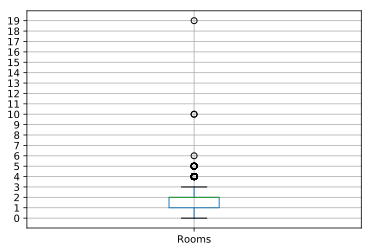

In [103]:
data_train[['Rooms']].plot.box()
plt.yticks(np.arange(0, 20, step=1))
plt.grid()


## Очистка данных

## Оценка модели на очищенных данных

## Конструирование признаков

## Обучение моделей и выбор лучшей

## Итоговое предсказание